### Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Read data and adjust values as needed

In [2]:
data = pd.read_csv("student_adaptability.csv")
data.head(10)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
5,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
6,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,0,No,Mobile,Low
7,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
8,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
9,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate


In [3]:
data.drop(['IT Student','Load-shedding','Self Lms'],axis=1, inplace=True)

In [4]:
data.replace("Boy","Male",inplace=True)
data.replace("Girl","Female",inplace=True)
data.replace("Poor","Level 1 (Lower)",inplace=True)
data.replace("Mid","Level 2 (Middle)",inplace=True)
data.replace("Rich","Level 3 (Upper)",inplace=True)
data.replace("1-5","01-05",inplace=True)
data.replace("6-10","06-10",inplace=True)
data.replace("Low","1 (Low)",inplace=True)
data.replace("Moderate","2 (Moderate)",inplace=True)
data.replace("High","3 (High)",inplace=True)
data.replace("Yes","Town",inplace=True)
data.replace("No","Outside Town",inplace=True)
data.head(10)

,Gender,Age,Education Level,Institution Type,Location,Financial Condition,Internet Type,Network Type,Class Duration,Device,Adaptivity Level
0,Male,21-25,University,Non Government,Town,Level 2 (Middle),Wifi,4G,3-6,Tab,2 (Moderate)
1,Female,21-25,University,Non Government,Town,Level 2 (Middle),Mobile Data,4G,1-3,Mobile,2 (Moderate)
2,Female,16-20,College,Government,Town,Level 2 (Middle),Wifi,4G,1-3,Mobile,2 (Moderate)
3,Female,11-15,School,Non Government,Town,Level 2 (Middle),Mobile Data,4G,1-3,Mobile,2 (Moderate)
4,Female,16-20,School,Non Government,Town,Level 1 (Lower),Mobile Data,3G,0,Mobile,1 (Low)
5,Male,11-15,School,Non Government,Town,Level 1 (Lower),Mobile Data,3G,1-3,Mobile,1 (Low)
6,Male,11-15,School,Non Government,Town,Level 2 (Middle),Wifi,4G,0,Mobile,1 (Low)
7,Male,11-15,School,Non Government,Town,Level 2 (Middle),Wifi,4G,1-3,Mobile,2 (Moderate)
8,Male,16-20,College,Government,Town,Level 2 (Middle),Wifi,4G,1-3,Mobile,1 (Low)
9,Male,11-15,School,Non Government,Town,Level 2 (Middle),Mobile Data,3G,1-3,Mobile,2 (Moderate)


### Analyze respondent data

In [5]:
data.shape

(1205, 11)

#### Gender

In [6]:
gender = pd.DataFrame(data[['Gender']])
gender_data = gender.value_counts(dropna=False, sort=False).reset_index(name='Total')
gender_data.head()

,Gender,Total
0,Female,542
1,Male,663


<AxesSubplot:title={'center':'Participant genders'}, ylabel='Total'>

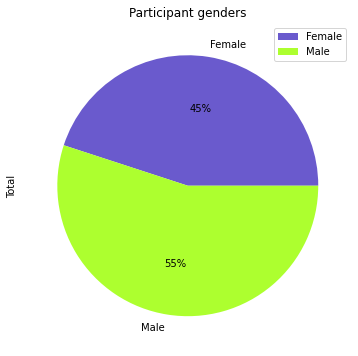

In [7]:
gender_data.groupby(['Gender']).sum().plot(
    kind='pie', 
    figsize=(9,6),
    y='Total',
    title="Participant genders", 
    autopct='%1.0f%%', 
    colors=['slateblue','greenyellow'])

#### Age

In [8]:
age = pd.DataFrame(data[['Age']])
age_data = age.value_counts(dropna=False, sort=False).reset_index(name='Total')
age_data.head(6)

,Age,Total
0,01-05,81
1,06-10,51
2,11-15,353
3,16-20,278
4,21-25,374
5,26-30,68


<AxesSubplot:title={'center':'Participant age'}, ylabel='Total'>

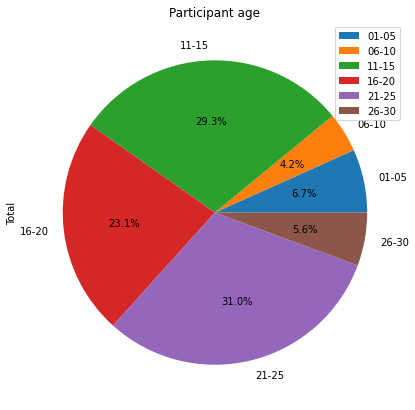

In [9]:
age_data.groupby(['Age']).sum().plot(
    kind='pie', 
    figsize=(9,7),
    y='Total',
    title="Participant age", 
    autopct='%1.01f%%')

In [10]:
edu = pd.DataFrame(data[['Education Level']])
edu_data = edu.value_counts(dropna=False, sort=False).reset_index(name='Total')
edu_data.head()

,Education Level,Total
0,College,219
1,School,530
2,University,456


<AxesSubplot:title={'center':'Participant education level'}, ylabel='Total'>

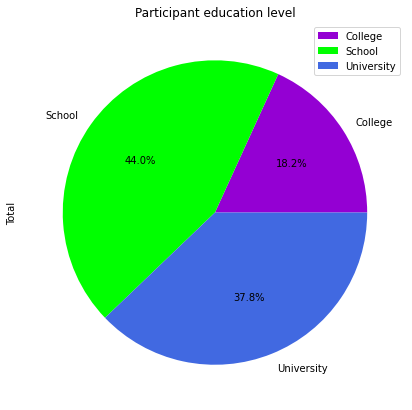

In [11]:
edu_data.groupby(['Education Level']).sum().plot(
    kind='pie', 
    figsize=(9,7),
    y='Total',
    title="Participant education level", 
    autopct='%1.01f%%',
    colors=['darkviolet','lime','royalblue'])

In [12]:
eduty = pd.DataFrame(data[['Education Level','Institution Type']])
eduty_data = eduty.value_counts(dropna=False, sort=False).reset_index(name='Total')
eduty_data.head()

,Education Level,Institution Type,Total
0,College,Government,127
1,College,Non Government,92
2,School,Government,100
3,School,Non Government,430
4,University,Government,155


<AxesSubplot:title={'center':'Participant education institution'}, ylabel='Total'>

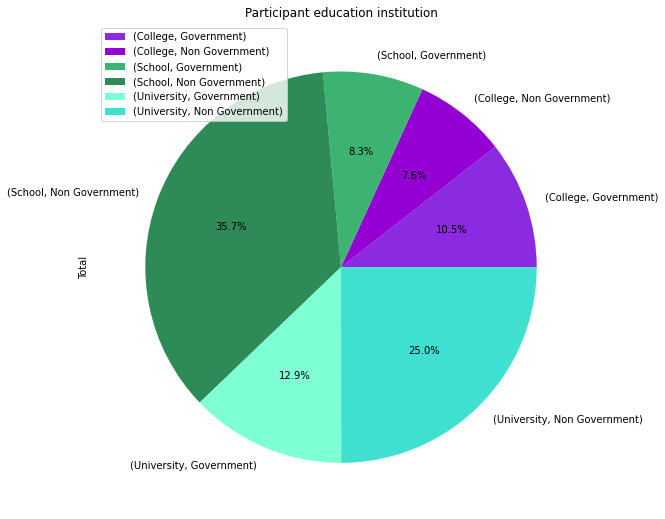

In [13]:
eduty_data.groupby(['Education Level','Institution Type']).sum().plot(
    kind='pie', 
    figsize=(9,9),
    y='Total',
    title="Participant education institution", 
    autopct='%1.01f%%',
    colors=['blueviolet','darkviolet','mediumseagreen','seagreen','aquamarine','turquoise'])

In [14]:
loc = pd.DataFrame(data[['Location']])
loc_data = loc.value_counts(dropna=False, sort=False).reset_index(name='Total')
loc_data.head()

,Location,Total
0,Outside Town,270
1,Town,935


<AxesSubplot:title={'center':'Participant location'}, ylabel='Total'>

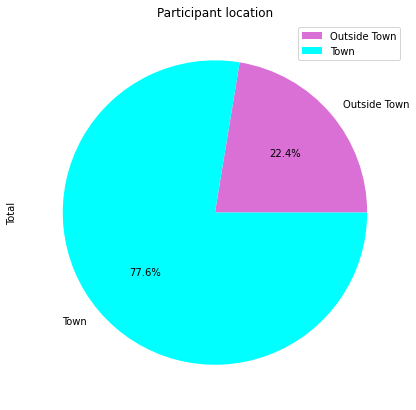

In [15]:
loc_data.groupby(['Location']).sum().plot(
    kind='pie', 
    figsize=(9,7),
    y='Total',
    title="Participant location", 
    autopct='%1.01f%%',
    colors=['orchid','aqua'])

#### Network Type

In [16]:
net = pd.DataFrame(data[['Network Type']])
net_data = net.value_counts(dropna=False, sort=False).reset_index(name='Total')
net_data.head()

,Network Type,Total
0,2G,19
1,3G,411
2,4G,775


<AxesSubplot:title={'center':'Network type used by participants'}, ylabel='Total'>

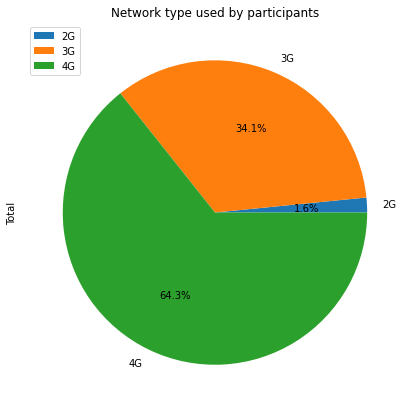

In [17]:
net_data.groupby(['Network Type']).sum().plot(
    kind='pie', 
    figsize=(9,7),
    y='Total',
    title="Network type used by participants", 
    autopct='%1.01f%%')

#### Device type

In [18]:
device = pd.DataFrame(data[['Device']])
device_data = device.value_counts(dropna=False, sort=False).reset_index(name='Total')
device_data.head()

,Device,Total
0,Computer,162
1,Mobile,1013
2,Tab,30


<AxesSubplot:title={'center':'Device used by participants'}, ylabel='Total'>

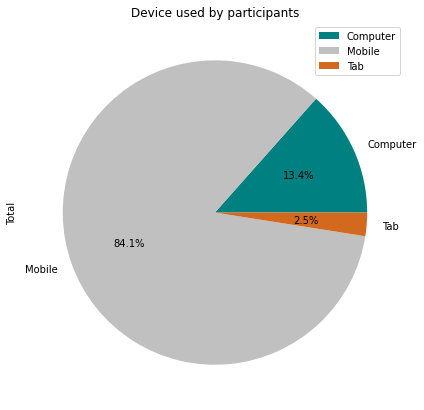

In [19]:
device_data.groupby(['Device']).sum().plot(
    kind='pie', 
    figsize=(9,7),
    y='Total',
    title="Device used by participants", 
    autopct='%1.01f%%',
    colors=['teal','silver','chocolate'])

### Analyze adaptability level

In [20]:
adaptability = pd.DataFrame(data[['Adaptivity Level']])
adaptability_data = adaptability.value_counts(dropna=False, sort=False).reset_index(name='Total')
adaptability_data.head()
adaptability_data.groupby(['Adaptivity Level']).sum().plot(
    kind='pie', 
    figsize=(9,7),
    y='Total',
    title="Device used by participants", 
    autopct='%1.01f%%')

,Adaptivity Level,Total
0,1 (Low),480
1,2 (Moderate),625
2,3 (High),100


<AxesSubplot:title={'center':'Participants adaptivity level'}, ylabel='Total'>

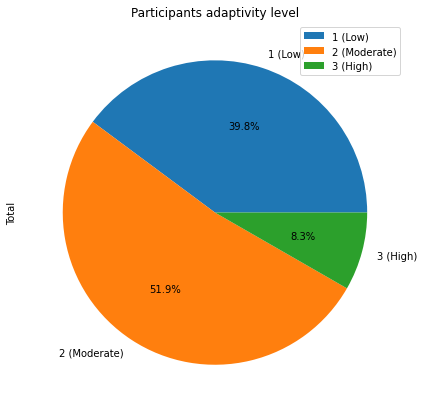

In [38]:
adaptability_data.groupby(['Adaptivity Level']).sum().plot(
    kind='pie', 
    figsize=(9,7),
    y='Total',
    title="Participants adaptivity level", 
    autopct='%1.01f%%')

#### By gender

In [22]:
gender_corr = pd.DataFrame(data[['Gender','Adaptivity Level']])
gc = gender_corr.value_counts(dropna=False, sort=False).reset_index(name='Total')
gc.head(20)

,Gender,Adaptivity Level,Total
0,Female,1 (Low),235
1,Female,2 (Moderate),278
2,Female,3 (High),29
3,Male,1 (Low),245
4,Male,2 (Moderate),347
5,Male,3 (High),71


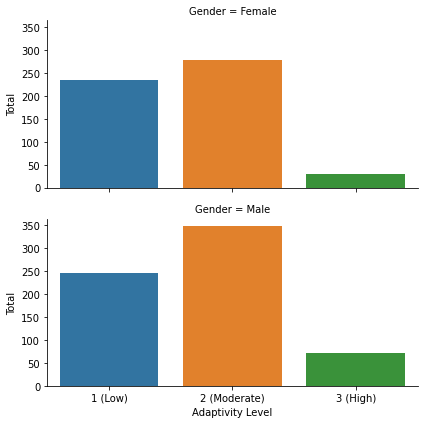

In [23]:
sns.catplot(data=gc, x='Adaptivity Level',y='Total',row='Gender',kind='bar',height=3,aspect=2)

<AxesSubplot:xlabel='Adaptivity Level'>

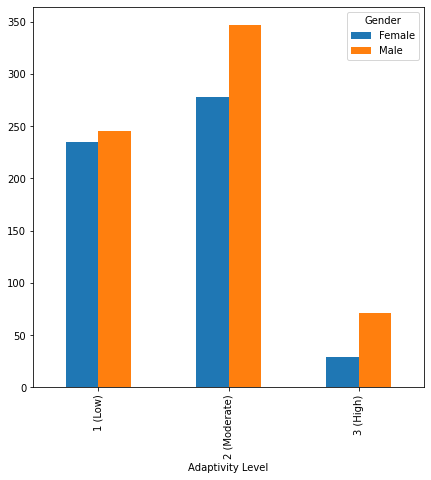

In [24]:
gc.pivot(index='Adaptivity Level', columns='Gender', values='Total').plot.bar(figsize=(7,7))

#### By age

In [25]:
age_corr = pd.DataFrame(data[['Age','Adaptivity Level']])
ac = age_corr.value_counts(dropna=False, sort=False).reset_index(name='Total')
ac.head(20)

,Age,Adaptivity Level,Total
0,01-05,1 (Low),17
1,01-05,2 (Moderate),64
2,06-10,1 (Low),24
3,06-10,2 (Moderate),10
4,06-10,3 (High),17
5,11-15,1 (Low),120
6,11-15,2 (Moderate),205
7,11-15,3 (High),28
8,16-20,1 (Low),144
9,16-20,2 (Moderate),129


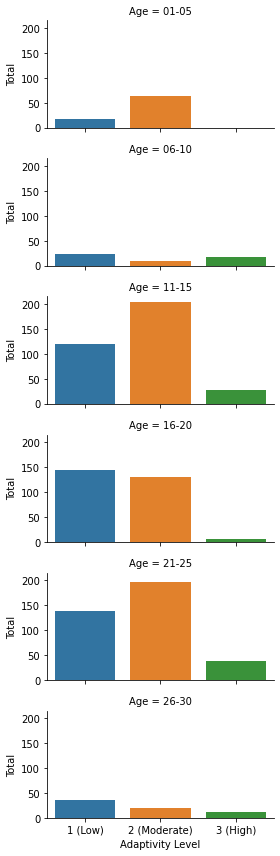

In [26]:
sns.catplot(data=ac, x='Adaptivity Level',y='Total',row='Age',kind='bar',height=2,aspect=2)

<AxesSubplot:xlabel='Adaptivity Level'>

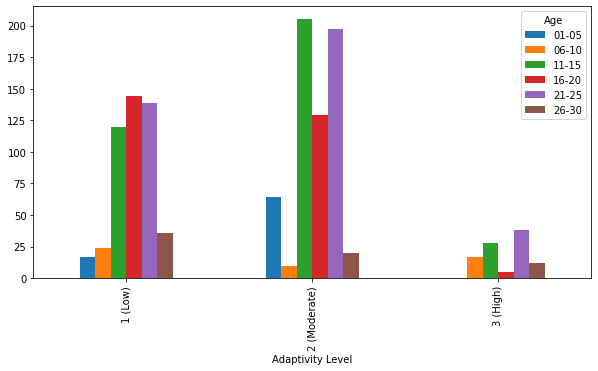

In [27]:
ac.pivot(index='Adaptivity Level', columns='Age', values='Total').plot.bar(figsize=(10,5))

In [28]:
duration_corr = pd.DataFrame(data[['Class Duration','Adaptivity Level']])
dc = duration_corr.value_counts(dropna=False, sort=False).reset_index(name='Total')
dc.head(20)

,Class Duration,Adaptivity Level,Total
0,0,1 (Low),144
1,0,2 (Moderate),10
2,1-3,1 (Low),290
3,1-3,2 (Moderate),468
4,1-3,3 (High),82
5,3-6,1 (Low),46
6,3-6,2 (Moderate),147
7,3-6,3 (High),18


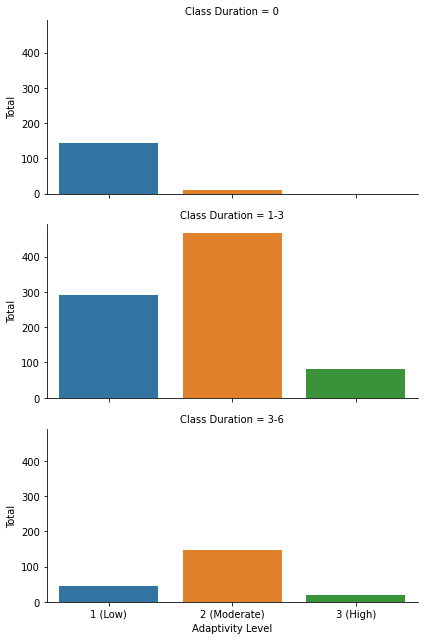

In [29]:
sns.catplot(data=dc, x='Adaptivity Level',y='Total',row='Class Duration',kind='bar',height=3,aspect=2)

<AxesSubplot:xlabel='Adaptivity Level'>

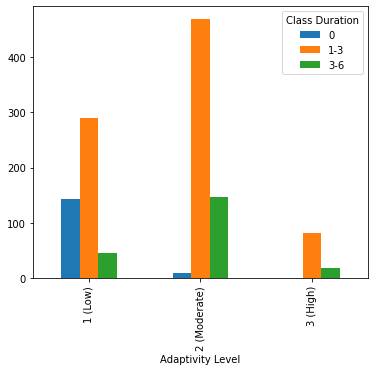

In [30]:
dc.pivot(index='Adaptivity Level', columns='Class Duration', values='Total').plot.bar(figsize=(6,5))

In [31]:
network_corr = pd.DataFrame(data[['Network Type','Adaptivity Level']])
nc = network_corr.value_counts(dropna=False, sort=False).reset_index(name='Total')
nc.head(20)

,Network Type,Adaptivity Level,Total
0,2G,1 (Low),16
1,2G,2 (Moderate),3
2,3G,1 (Low),186
3,3G,2 (Moderate),203
4,3G,3 (High),22
5,4G,1 (Low),278
6,4G,2 (Moderate),419
7,4G,3 (High),78


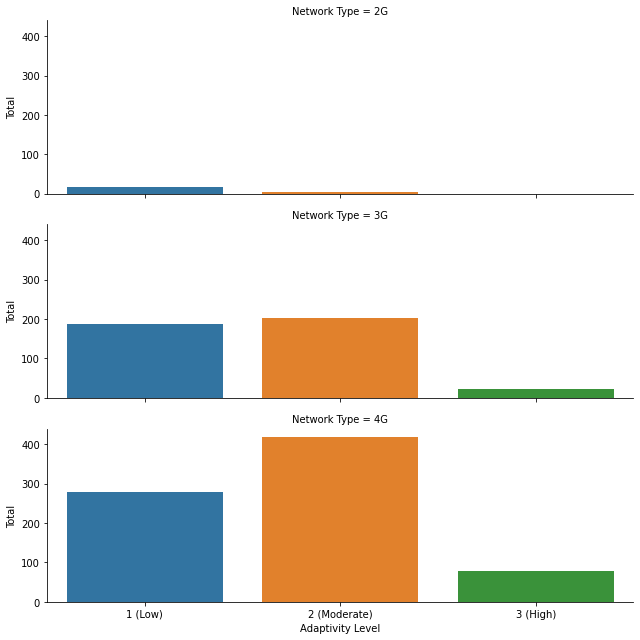

In [32]:
sns.catplot(data=nc, x='Adaptivity Level',y='Total',row='Network Type',kind='bar',height=3,aspect=3)

<AxesSubplot:xlabel='Adaptivity Level'>

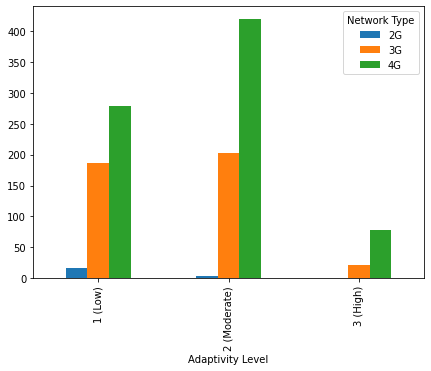

In [33]:
nc.pivot(index='Adaptivity Level', columns='Network Type', values='Total').plot.bar(figsize=(7,5))

In [34]:
device_corr = pd.DataFrame(data[['Device','Adaptivity Level']])
pc = device_corr.value_counts(dropna=False, sort=False).reset_index(name='Total')
pc.head(20)

,Device,Adaptivity Level,Total
0,Computer,1 (Low),40
1,Computer,2 (Moderate),92
2,Computer,3 (High),30
3,Mobile,1 (Low),438
4,Mobile,2 (Moderate),507
5,Mobile,3 (High),68
6,Tab,1 (Low),2
7,Tab,2 (Moderate),26
8,Tab,3 (High),2


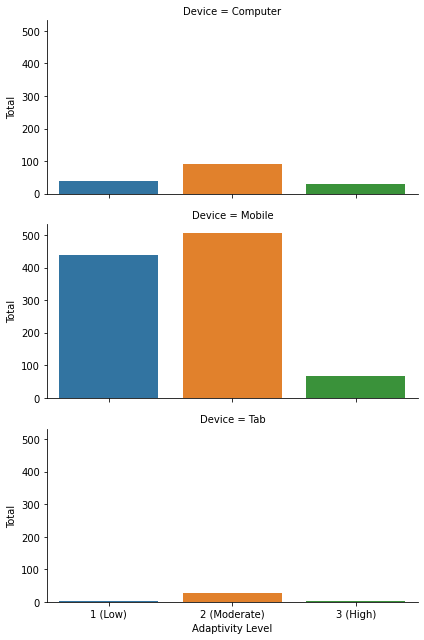

In [35]:
sns.catplot(data=pc, x='Adaptivity Level',y='Total',row='Device',kind='bar',height=3,aspect=2)

<AxesSubplot:xlabel='Adaptivity Level'>

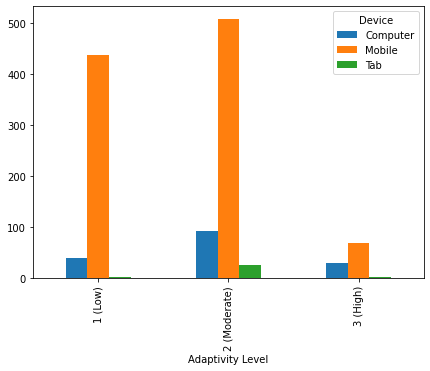

In [36]:
pc.pivot(index='Adaptivity Level', columns='Device', values='Total').plot.bar(figsize=(7,5))